<a href="https://colab.research.google.com/github/manjunath1005/Seaborn-Taxis-EDA/blob/main/EDA_taxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
df=sns.load_dataset("taxis")

In [4]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
df.shape

(6433, 14)

In [6]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [8]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [9]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [10]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [11]:
((df.isna().sum())/df.shape[0])*100

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [12]:
df.shape[0]-df.dropna().shape[0]

92

In [13]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100

1.4301259132597544

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(6341, 14)

In [16]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


# EDA for tip vs color

In [17]:
# tip is target

In [18]:
# tip is numerical feature, analyze with colour feature which is categorical

In [19]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


In [20]:
# graphical analysis of categorical

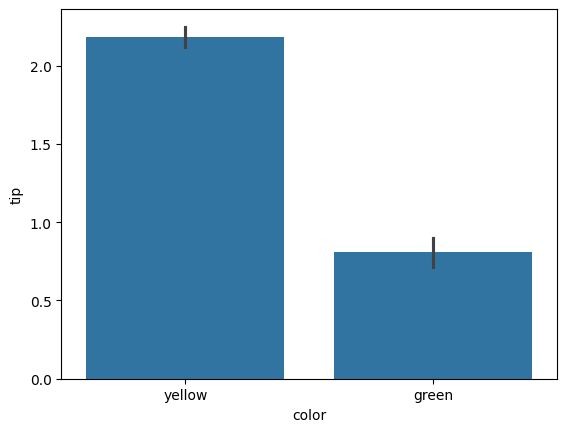

In [21]:
sns.barplot(x="color",y="tip",data=df)
plt.show()

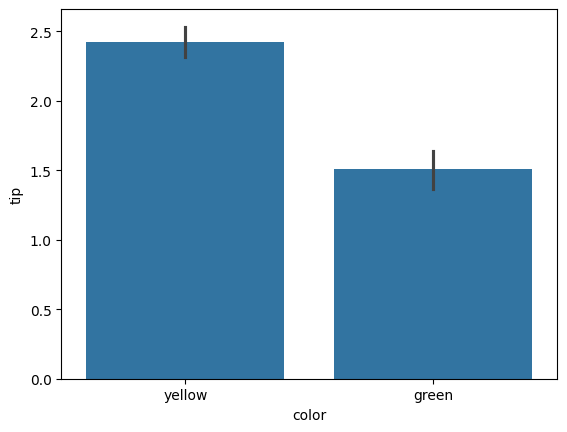

In [22]:
sns.barplot(x="color",y="tip",data=df,estimator='std')
plt.show()

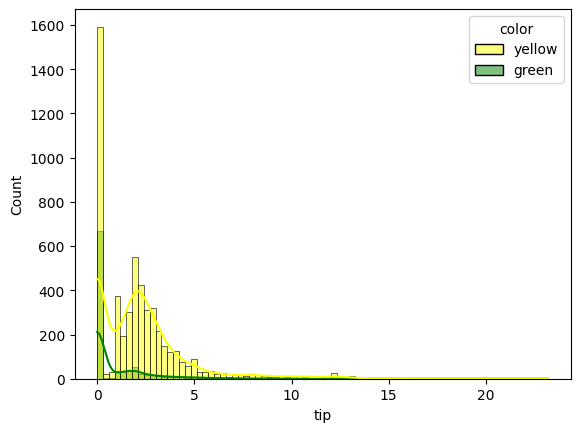

In [23]:
sns.histplot(x=df.tip,hue=df.color,kde=True,palette={"yellow":"yellow","green":"green"})
plt.show()

**Insights**

The histograms show that most tips are small, but the yellow group has more higher tips than the green group.

The bar charts show that the average tip is higher for yellow than for green. Overall, the yellow group tips more than the green group.


**Hypothesis**

  - H0: distribution of tip for yellow = distribution of tip for green

  - H1: distribution of tip for yellow ≠ distribution of tip for green

In [24]:
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']

In [25]:
green_tip.shape

(968,)

In [26]:
yellow_tip.shape

(5373,)

In [27]:
# Independent T-Test

t_stat, p_val = stats.ttest_ind(yellow_tip,green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64


In [28]:
if p_val < 0.05:
    print("Reject null hypothesis. The tip for yellow category is different that of green")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis. The tip for yellow category is different that of green


In [29]:
# There is effect of colour on tip column

## EDA for Tip vs Payment

In [30]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


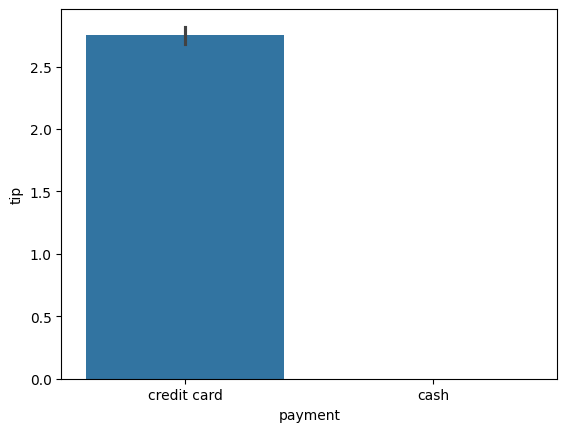

In [31]:
sns.barplot(x="payment",y="tip",data=df)
plt.show()

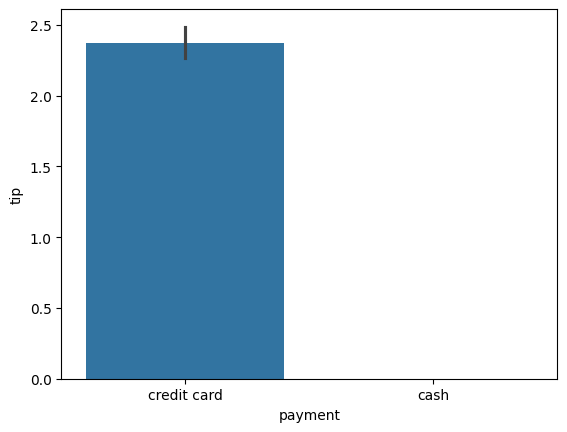

In [32]:
sns.barplot(x="payment",y="tip",data=df,estimator='std')
plt.show()

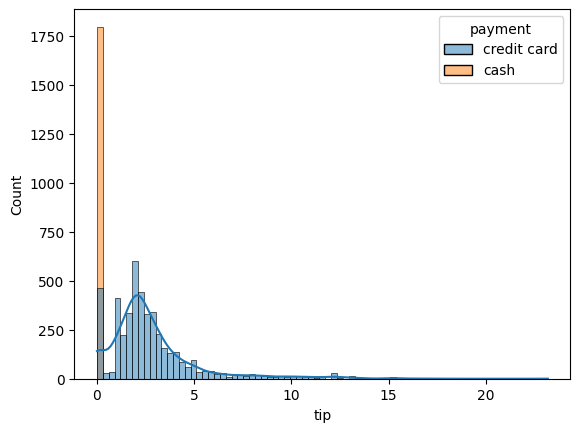

In [33]:
sns.histplot(x=df.tip,hue=df.payment,kde=True)
plt.show()

**Insights**

As we can see from the above graphs, only passengers using payment mode as credit card are giving tips.

**Hypothesis**

In [34]:
cash_tip=df['tip'][df['payment']=='cash']
credit_tip=df['tip'][df['payment']=='credit card']

In [35]:
t_stat1,p_val1=stats.ttest_ind(credit_tip,cash_tip)
print("Independent T-Test statistic:", t_stat1)
print("P-value:", p_val1)

Independent T-Test statistic: 49.09538452722153
P-value: 0.0


In [36]:
if p_val1 < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis.


## EDA pickup_borough

In [37]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [38]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


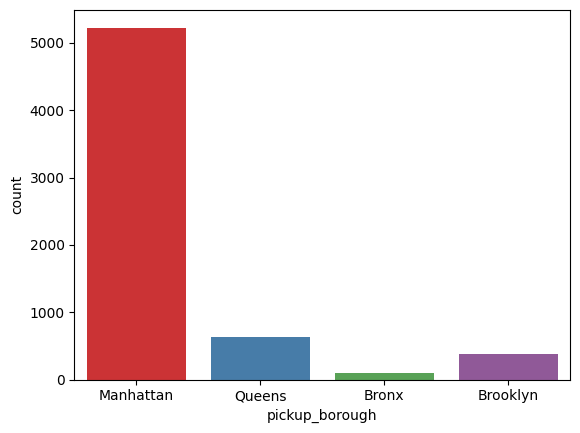

In [39]:
sns.countplot(x=df['pickup_borough'],hue=df['pickup_borough'],palette='Set1')
plt.show()

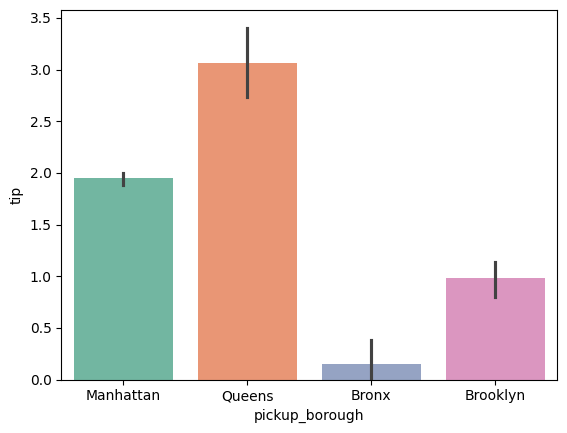

In [40]:
sns.barplot(x="pickup_borough",hue='pickup_borough',y="tip",data=df,palette='Set2')
plt.show()

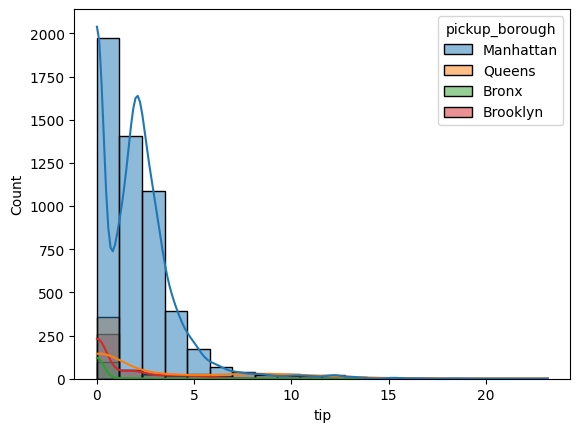

In [41]:
sns.histplot(x=df.tip,hue=df.pickup_borough,kde=True,bins=20)
plt.show()

**Hypothesis**

  - H0: Distribution of tip is the same across all pickup_borough categories

  - H1: At leat one category has a different distribution of tip

In [42]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']

In [43]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis:")

ANOVA F-statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis


**Hypothesis for Tukey test**

  - H0: Distribution of group1 = distribution of group2

  - H1: Distribution of group1 ≠ distribution of group2

In [44]:
# Perform Tukey HSD
tukey_results = pairwise_tukeyhsd(df['tip'], df['pickup_borough'],alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


## EDA dropoff_borough

In [45]:
df.dropoff_borough.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [46]:
df.dropoff_borough.value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


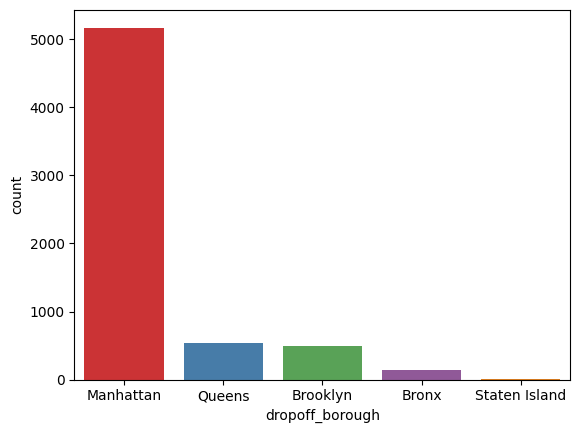

In [47]:
sns.countplot(x=df['dropoff_borough'],hue=df['dropoff_borough'],palette='Set1')
plt.show()

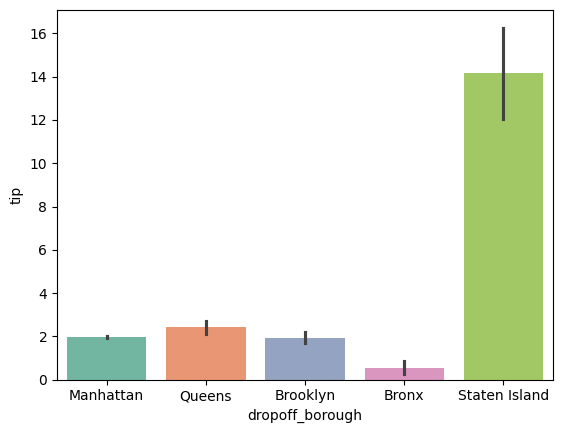

In [48]:
sns.barplot(x="dropoff_borough",hue='dropoff_borough',y="tip",data=df,palette='Set2')
plt.show()

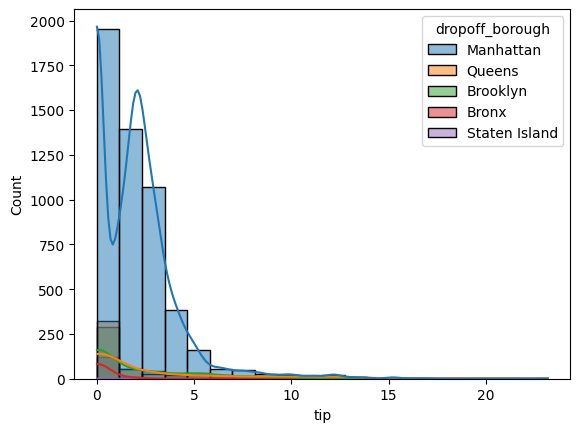

In [49]:
sns.histplot(x=df.tip,hue=df.dropoff_borough,kde=True,bins=20)
plt.show()

**Hypothesis**

  - H0: Distribution of tip is the same across all dropoff_borough categories

  - H1: At leat one category has a different distribution of tip

In [50]:
manhattan_dropoff_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_dropoff_tip=df['tip'][df['dropoff_borough']=='Queens']
brooklyn_dropoff_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
bronx_dropoff_tip=df['tip'][df['dropoff_borough']=='Bronx']
staten_island_dropoff_tip=df['tip'][df['dropoff_borough']=='Staten Island']

In [51]:
f_stat2,p_val2=stats.f_oneway(manhattan_dropoff_tip,queens_dropoff_tip,brooklyn_dropoff_tip,bronx_dropoff_tip,staten_island_dropoff_tip)
print("ANOVA F-statistic:", f_stat2)
print("P-value:", p_val2)

if p_val2 < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis:")

ANOVA F-statistic: 31.424177966968298
P-value: 5.87859571331583e-26
Reject null hypothesis


**Hypothesis**
- H0: Distribution of group1 = distribution of group2
- H1: Distribution of group1 ≠ distribution of group2

In [52]:
# Tukey HSD
tukey_results2 = pairwise_tukeyhsd(df['tip'], df['dropoff_borough'],alpha=0.05)
print(tukey_results2)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


## EDA Pickup_zone

In [53]:
df.pickup_zone.value_counts()

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


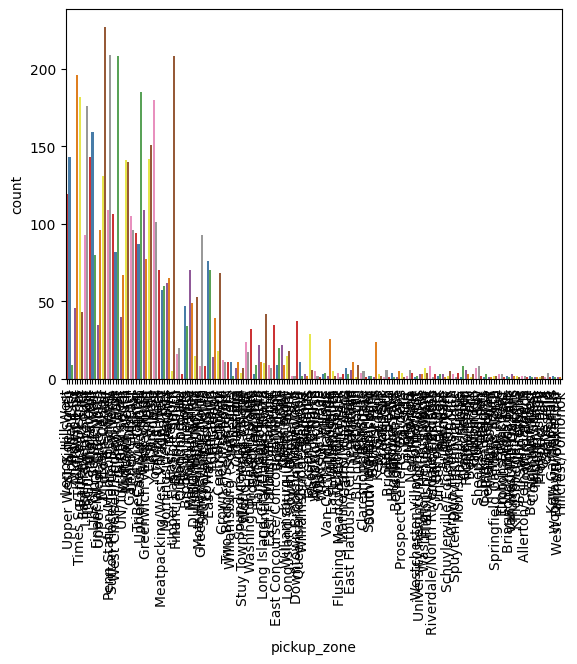

In [54]:
sns.countplot(x=df.pickup_zone,hue=df.pickup_zone,palette='Set1')
plt.xticks(rotation=90)
plt.show()

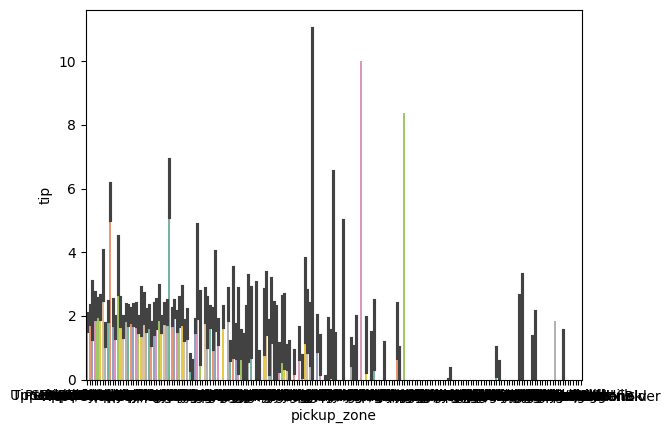

In [55]:
sns.barplot(x="pickup_zone",hue='pickup_zone',y="tip",data=df,palette='Set2')
plt.show()

In [56]:
categories=[group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat3,p_val3=stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat3)
print("P-value:", p_val3)

ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169


In [57]:
if p_val3<0.05:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Reject null hypothesis


## EDA dropoff_zone

In [58]:
categories2=[group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat4,p_val4=stats.f_oneway(*categories2)
print("ANOVA F-statistic:", f_stat4)
print("P-value:", p_val4)

ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120


In [59]:
if p_val4<0.05:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Reject null hypothesis


## EDA Passengers vs tips

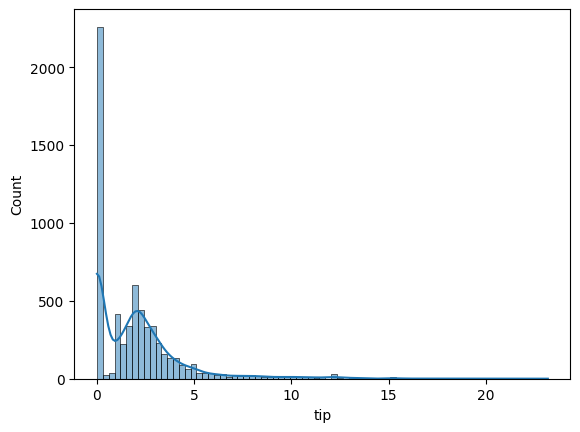

In [60]:
sns.histplot(df['tip'],kde=True)
plt.show()

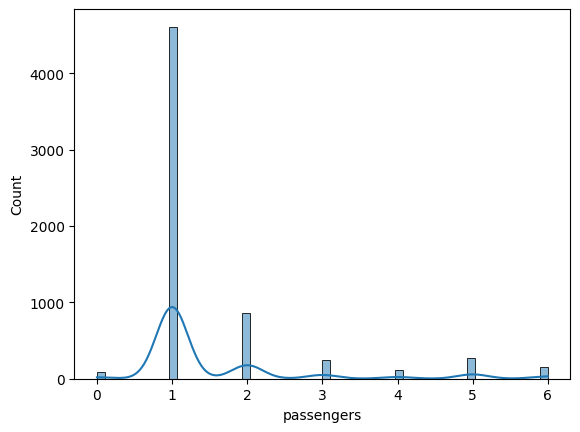

In [61]:
sns.histplot(df['passengers'],kde=True)
plt.show()

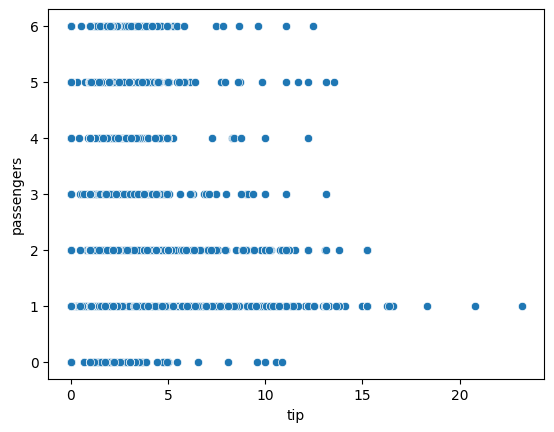

In [62]:
sns.scatterplot(x=df['tip'],y=df['passengers'])
plt.show()

**Hypothesis**

  - H0: Correlation is zero

  - H1: Correlation is Significant (not zero)

In [85]:
r, p_val5 = stats.pearsonr(df.tip, df.passengers)
print("Pearson Correlation Coefficient:", r)
print("P-value:", p_val5)

alpha = 0.05
if p_val5 < alpha:
    print("Reject null hypothesis: There IS a significant relationship")
else:
    print("Fail to reject null hypothesis: No significant relationship")

Pearson Correlation Coefficient: 0.017838280361313713
P-value: 0.15551969503298518
Fail to reject null hypothesis: No significant relationship


In [84]:
r1, p_val6 = stats.spearmanr(df.tip, df.passengers)
print("Spearman Correlation Coefficient:", r1)
print("P-value:", p_val6)

alpha = 0.05
if p_val6 < alpha:
    print("Reject null hypothesis: There IS a significant relationship")
else:
    print("Fail to reject null hypothesis: No significant relationship")

Spearman Correlation Coefficient: 0.027509812818779178
P-value: 0.028480753176042872
Reject null hypothesis: There IS a significant relationship


## EDA for tip vs fare

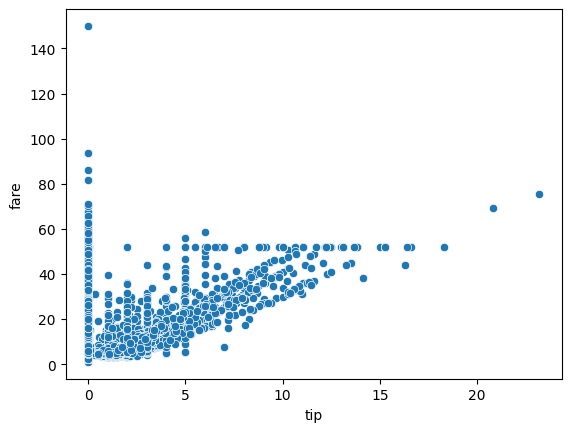

In [65]:
sns.scatterplot(x=df['tip'],y=df['fare'])
plt.show()

In [86]:
r2,p_val7=stats.spearmanr(df.tip,df.fare)
print("Spearman Correlation Coefficient:", r2)
print("P-value:", p_val7)
alpha=0.05
if p_val6<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Spearman Correlation Coefficient: 0.310254279563729
P-value: 1.5556730728881364e-141
Reject null hypothesis


## EDA tip vs distance

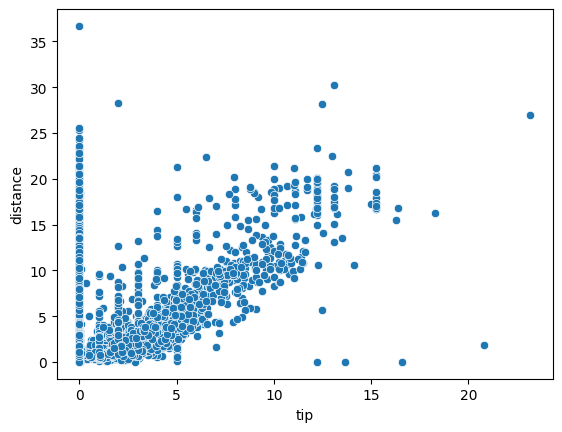

In [67]:
sns.scatterplot(x=df['tip'],y=df['distance'])
plt.show()

In [68]:
r3,p_val8=stats.spearmanr(df.tip,df.distance)
print("Spearman Correlation Coefficient:", r3)
print("P-value:", p_val8)

Spearman Correlation Coefficient: 0.29265085410043695
P-value: 1.9411181331374707e-125


In [87]:
if p_val8<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Reject null hypothesis


## EDA for tolls vs tips

In [70]:
df.tolls.value_counts()

,count
tolls,
0.00,6003
5.76,316
2.64,6
11.52,4
5.54,2
6.12,2
17.28,1
8.40,1
9.50,1


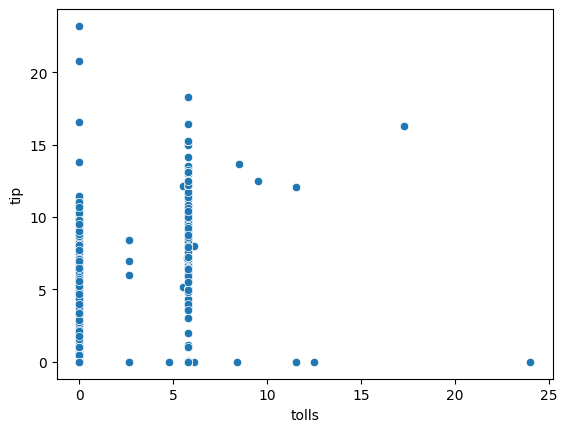

In [71]:
sns.scatterplot(x=df['tolls'],y=df['tip'])
plt.show()

In [72]:
r4,p_val9=stats.spearmanr(df.tolls,df.tip)
print("Spearman Correlation Coefficient:", r4)
print("P-value:", p_val9)

Spearman Correlation Coefficient: 0.175380002891528
P-value: 5.643276180955435e-45


In [73]:
if p_val9<alpha:
  print("Reject null hypothesis: There is no relationship")
else:
  print("Fail to reject null hypothesis")

Reject null hypothesis: There is no relationship


## EDA for tip vs total

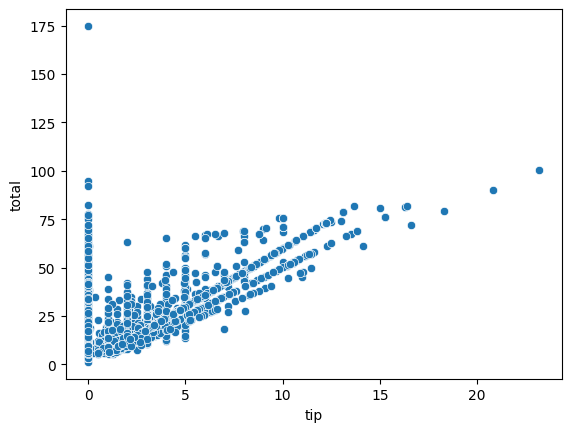

In [77]:
sns.scatterplot(x=df['tip'],y=df['total'])
plt.show()

In [78]:
r5,p_val10=stats.spearmanr(df.tip,df.total)
print("Spearman Correlation Coefficient:", r5)
print("P-value:", p_val10)

Spearman Correlation Coefficient: 0.5028299699182296
P-value: 0.0


In [88]:
if p_val10<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Reject null hypothesis


## Heatmap

In [74]:
numeric_col=['tip','passengers','fare','distance','tolls','total']

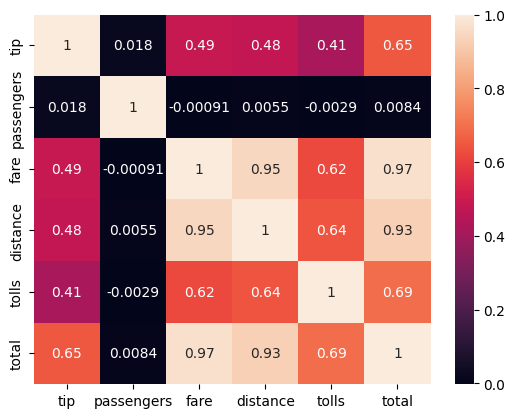

In [75]:
sns.heatmap(df[numeric_col].corr(),annot=True)
plt.show()